<a href="https://colab.research.google.com/github/raiadi96/mlAlgorithms/blob/master/PCAMnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
def load_housing_dataset(path):
  import pandas as pd
  import numpy as np

  """Loading the Housing Dataset"""
  path_file = pd.read_csv('/content/sample_data/mnist_train_small.csv')
  print(path_file.head(3))
  return path_file


In [8]:
data = load_housing_dataset('belp')
X,y = data.iloc[:,1:],data.iloc[:,0]

   6  0  0.1  0.2  0.3  0.4  ...  0.585  0.586  0.587  0.588  0.589  0.590
0  5  0    0    0    0    0  ...      0      0      0      0      0      0
1  7  0    0    0    0    0  ...      0      0      0      0      0      0
2  9  0    0    0    0    0  ...      0      0      0      0      0      0

[3 rows x 785 columns]


In [0]:
from sklearn.decomposition import PCA

pca = PCA(2)
pca_result = pca.fit_transform(X)


In [12]:
import pandas as pd
pca_df = pd.DataFrame(columns = ['pca1','pca2'])

pca_df['pca1'] = pca_result[:,0]
pca_df['pca2'] = pca_result[:,1]
pca.explained_variance_

array([333721.15996814, 242964.56152877])

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.patheffects as PathEffects

In [0]:
def scatter_plot(x, colors):
  num_classes = len(np.unique(colors))
  palette = np.array(sns.color_palette("hls", num_classes))
  f = plt.figure(figsize=(8, 8))
  ax = plt.subplot(aspect='equal')
  sc = ax.scatter(x[:,0], x[:,1], lw=0, s=40, c=palette[colors.astype(np.int)])
  txts = []
  for i in range(num_classes):

        # Position of each label at median of data points.

        xtext, ytext = np.median(x[colors == i, :], axis=0)
        txt = ax.text(xtext, ytext, str(i), fontsize=24)
        txt.set_path_effects([
            PathEffects.Stroke(linewidth=5, foreground="w"),
            PathEffects.Normal()])
        txts.append(txt)

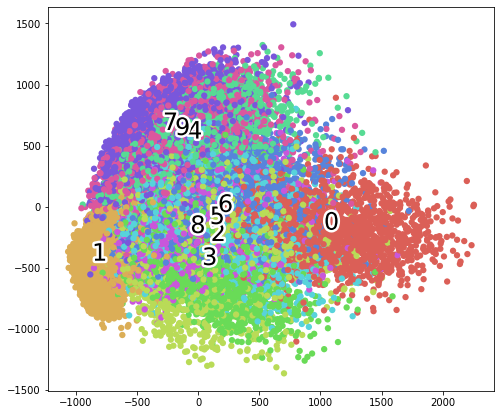

In [26]:
scatter_plot(pca_df.values,y)